In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import kagglehub
import seaborn as sns
import os

In [6]:
path = kagglehub.dataset_download("vinayakshanawad/heart-rate-prediction-to-monitor-stress-level")

In [7]:
print(path)

C:\Users\rodwa\.cache\kagglehub\datasets\vinayakshanawad\heart-rate-prediction-to-monitor-stress-level\versions\1


In [8]:
train_path = path + "/Train Data/Train Data Zip"
test_path = path + "/Test Data/Test Zip"
def load_time_domain(folder): # carregar treino e teste e concatenar
    file = next((f for f in os.listdir(folder) if "time_domain" in f.lower() and f.endswith(".csv")), 
    None )
    
    if file is None:
        raise FileNotFoundError(f"Nenhum arquivo 'time_domain' encontrado em {folder}")
    
    
    df = pd.read_csv(os.path.join(folder, file))
    return df

In [9]:
train_csv = load_time_domain(train_path)
test_csv = load_time_domain(test_path)
df = pd.concat([train_csv, test_csv], axis=0).reset_index(drop=True)

1. Describe your dataset and its features, identifying the number of observations N,
number of predictor variables D, number of classes L and class-distribution (that
is, the number of observations for each of the classes).

In [10]:
df.shape

(410322, 20)

In [11]:
df.columns

Index(['MEAN_RR', 'MEDIAN_RR', 'SDRR', 'RMSSD', 'SDSD', 'SDRR_RMSSD', 'HR',
       'pNN25', 'pNN50', 'KURT', 'SKEW', 'MEAN_REL_RR', 'MEDIAN_REL_RR',
       'SDRR_REL_RR', 'RMSSD_REL_RR', 'SDSD_REL_RR', 'SDRR_RMSSD_REL_RR',
       'KURT_REL_RR', 'SKEW_REL_RR', 'uuid'],
      dtype='object')

In [12]:
df.head(5)

,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,HR,pNN25,pNN50,KURT,SKEW,MEAN_REL_RR,MEDIAN_REL_RR,SDRR_REL_RR,RMSSD_REL_RR,SDSD_REL_RR,SDRR_RMSSD_REL_RR,KURT_REL_RR,SKEW_REL_RR,uuid
0,885.157845,853.763730,140.972741,15.554505,15.553371,9.063146,69.499952,11.133333,0.533333,-0.856554,0.335218,-0.000203,-0.000179,0.017080,0.007969,0.007969,2.143342,-0.856554,0.335218,89df2855-56eb-4706-a23b-b39363dd605a
1,939.425371,948.357865,81.317742,12.964439,12.964195,6.272369,64.363150,5.600000,0.000000,-0.408190,-0.155286,-0.000059,0.000611,0.013978,0.004769,0.004769,2.930855,-0.408190,-0.155286,80c795e4-aa56-4cc0-939c-19634b89cbb2
2,898.186047,907.006860,84.497236,16.305279,16.305274,5.182201,67.450066,13.066667,0.200000,0.351789,-0.656813,-0.000011,-0.000263,0.018539,0.008716,0.008716,2.127053,0.351789,-0.656813,c2d5d102-967c-487d-88f2-8b005a449f3e
3,881.757865,893.460030,90.370537,15.720468,15.720068,5.748591,68.809562,11.800000,0.133333,-0.504947,-0.386138,0.000112,0.000494,0.017761,0.008660,0.008660,2.050988,-0.504947,-0.386138,37eabc44-1349-4040-8896-0d113ad4811f
4,809.625331,811.184865,62.766242,19.213819,19.213657,3.266724,74.565728,20.200000,0.200000,-0.548408,-0.154252,-0.000100,-0.002736,0.023715,0.013055,0.013055,1.816544,-0.548408,-0.154252,aa777a6a-7aa3-4f6e-aced-70f8691dd2b7


In [13]:
df.isna().sum()

MEAN_RR                  0
MEDIAN_RR                0
SDRR                     0
RMSSD                    0
SDSD                     0
SDRR_RMSSD               0
HR                   41033
pNN25                    0
pNN50                    0
KURT                     0
SKEW                     0
MEAN_REL_RR              0
MEDIAN_REL_RR            0
SDRR_REL_RR              0
RMSSD_REL_RR             0
SDSD_REL_RR              0
SDRR_RMSSD_REL_RR        0
KURT_REL_RR              0
SKEW_REL_RR              0
uuid                     0
dtype: int64

Temos $N = 410.322$, $D = 19$

Temos 20 colunas, porém uma é somente o identificador de cada amostra.

Nesse caso, para o domínio do tempo, não temos classes.

2.  Perform an unconditional mono-variate analysis of each of the D predictors. Specifically, you must plot their (unconditional) histograms and box-plots, calculate their
(unconditional) mean $µ_d$, standard deviation $σ_d$ and skewness $γ_d$, with $d = 1, . . . , D,$
using all the $N$ observations.

In [ ]:
# Seleciona apenas as colunas numéricas (excluindo 'uuid')
colunas_numericas = df.select_dtypes(include='number').columns

# calcula estatisticas
stats = pd.DataFrame({
    'Mean': df[colunas_numericas].mean(),
    'StdDev': df[colunas_numericas].std(),
    'Skewness': df[colunas_numericas].skew()
})

print(stats)

                         Mean      StdDev  Skewness
MEAN_RR            846.670724  124.585711  0.647743
MEDIAN_RR          841.980595  132.286414  0.926649
SDRR               109.302941   77.065738  2.366864
RMSSD               14.978707    4.122602  0.399445
SDSD                14.977976    4.122605  0.399584
SDRR_RMSSD           7.393869    5.144097  3.712863
HR                  73.941824   10.337453  0.411721
pNN25                9.845863    8.202293  1.201262
pNN50                0.865656    0.989847  1.264715
KURT                 0.522984    1.790502  5.701528
SKEW                 0.041958    0.699008  1.222689
MEAN_REL_RR         -0.000002    0.000163  0.125862
MEDIAN_REL_RR       -0.000465    0.000867 -0.948825
SDRR_REL_RR          0.018570    0.005454  0.869038
RMSSD_REL_RR         0.009700    0.003896  1.257683
SDSD_REL_RR          0.009700    0.003896  1.257684
SDRR_RMSSD_REL_RR    2.006945    0.375986  0.840013
KURT_REL_RR          0.522984    1.790502  5.701528
SKEW_REL_RR 

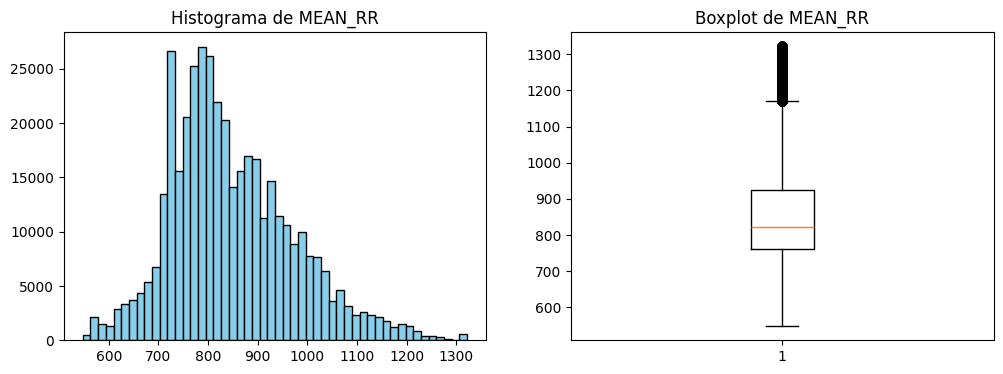

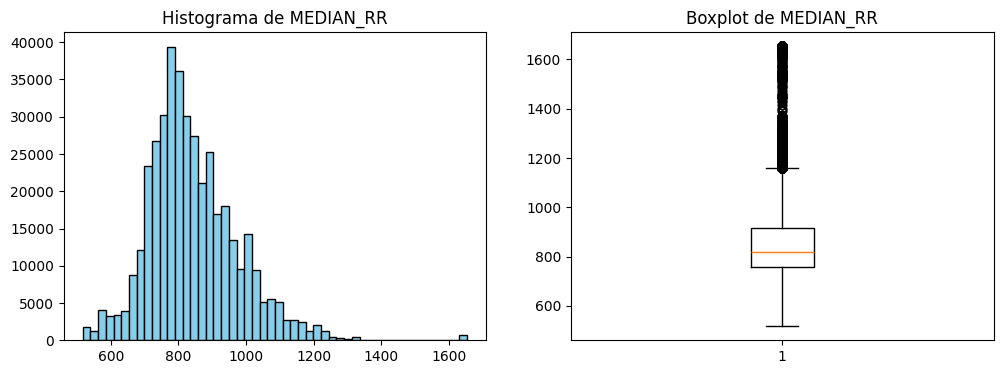

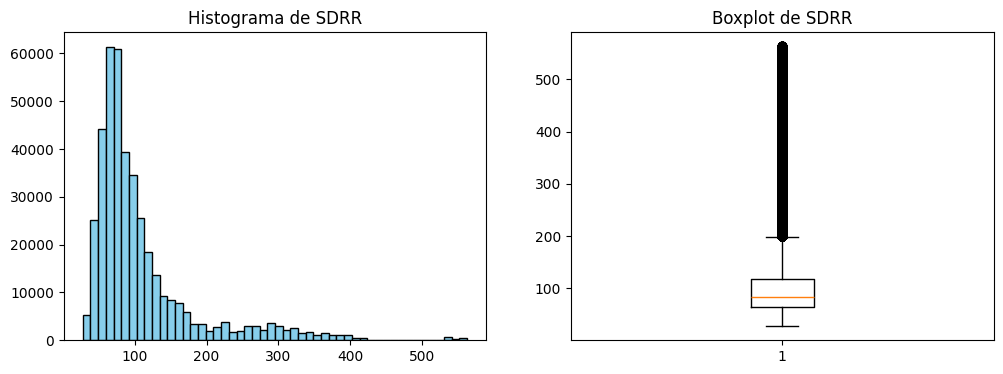

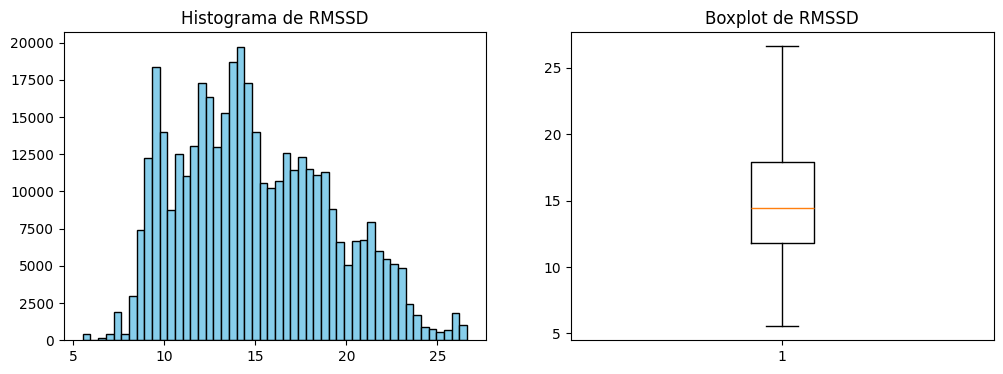

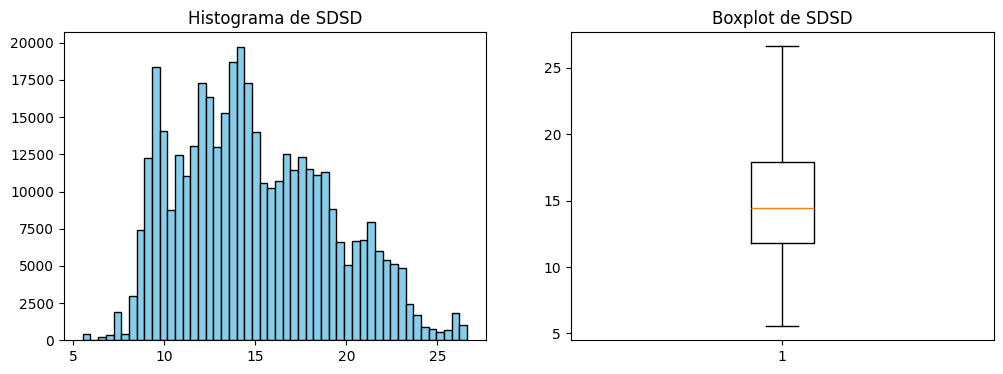

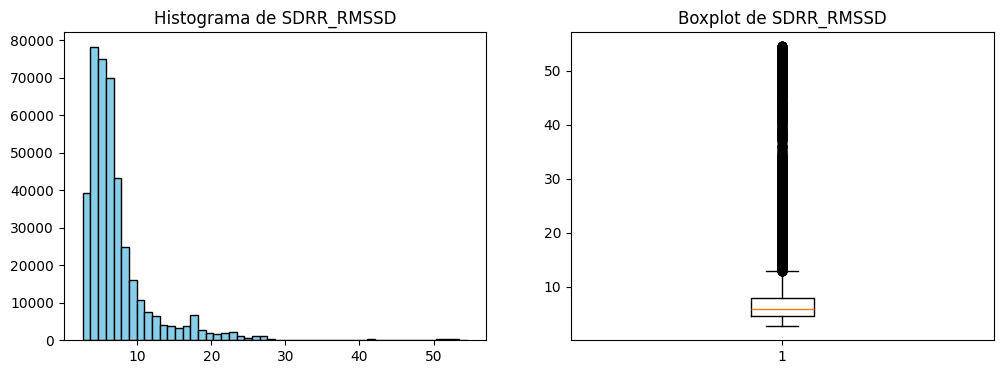

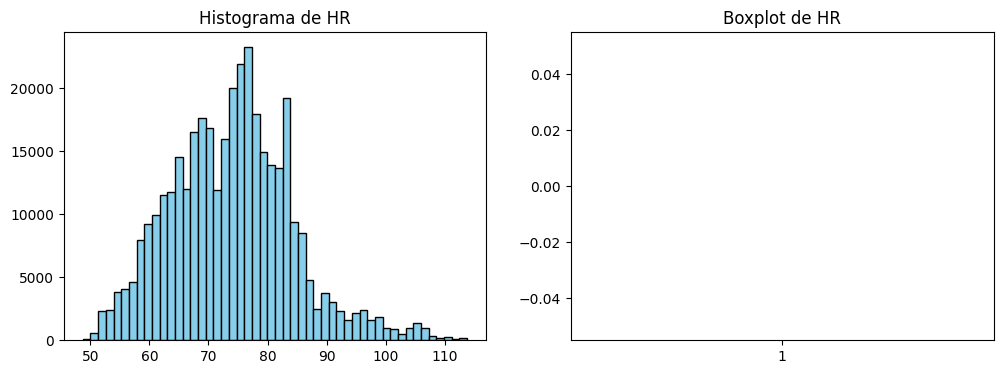

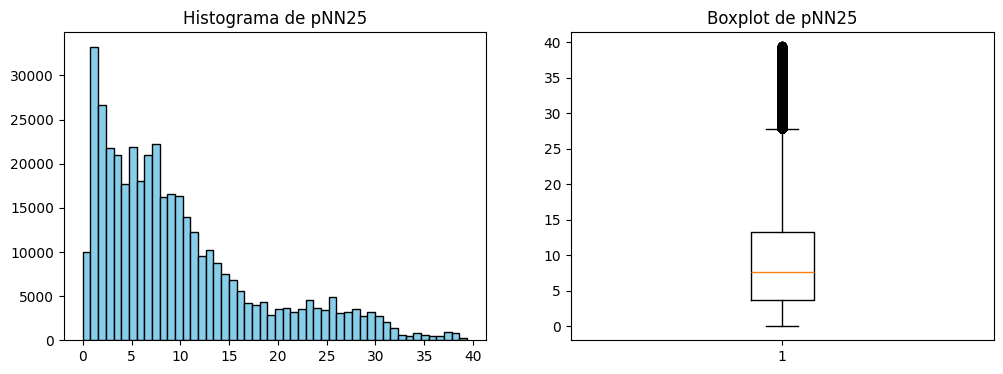

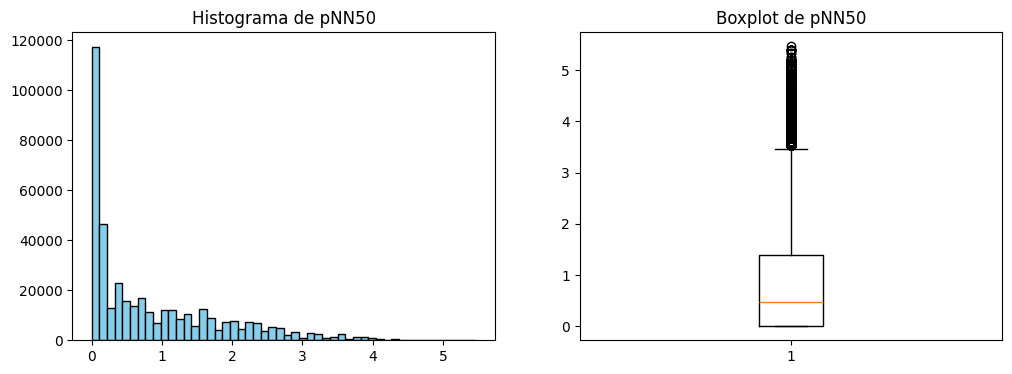

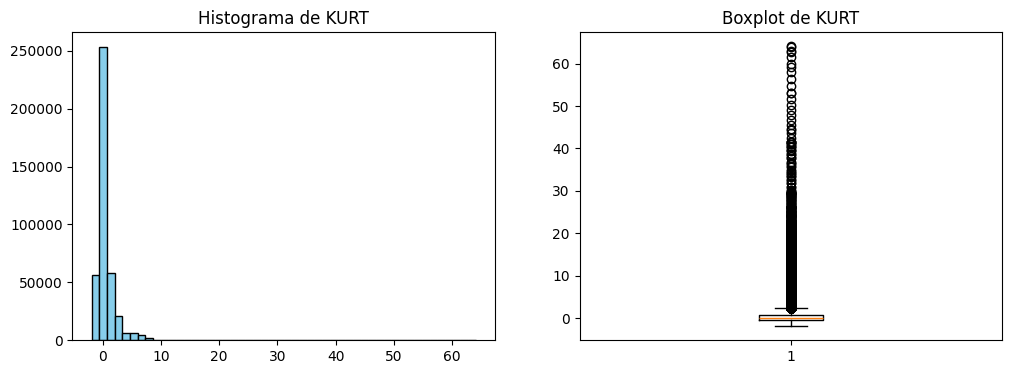

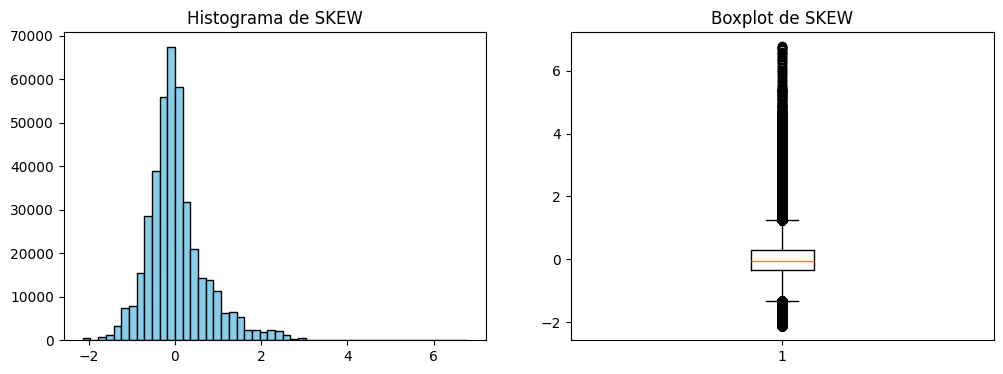

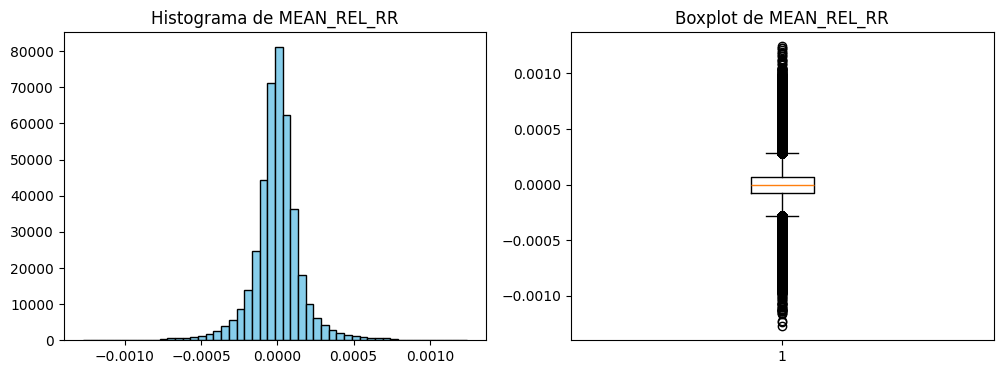

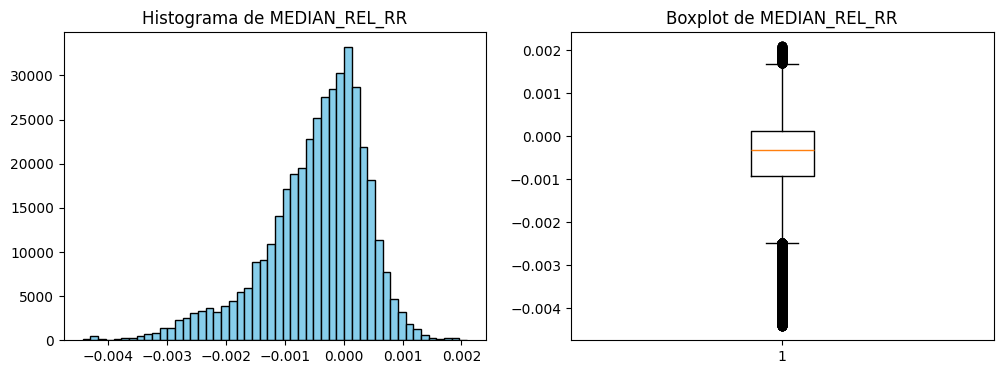

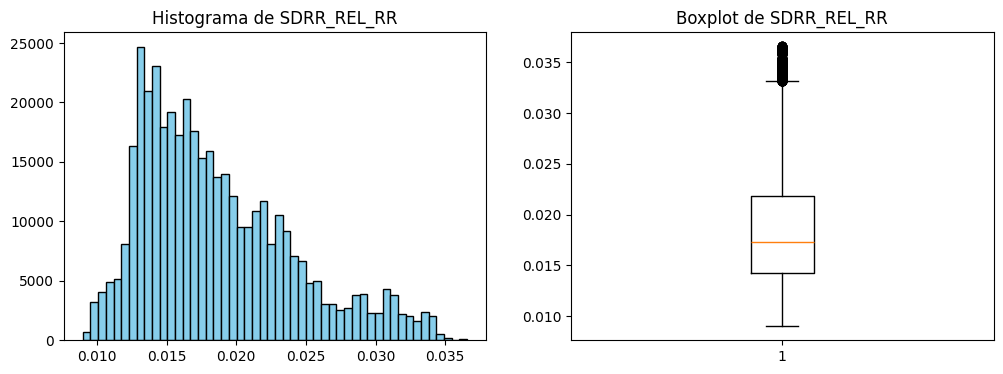

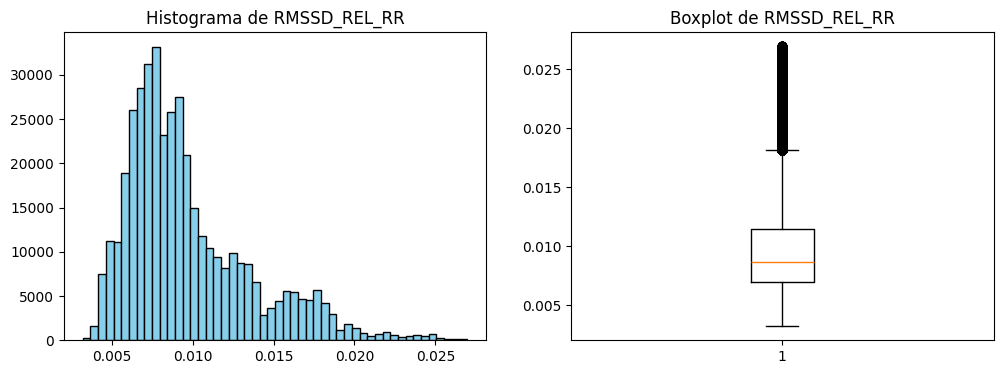

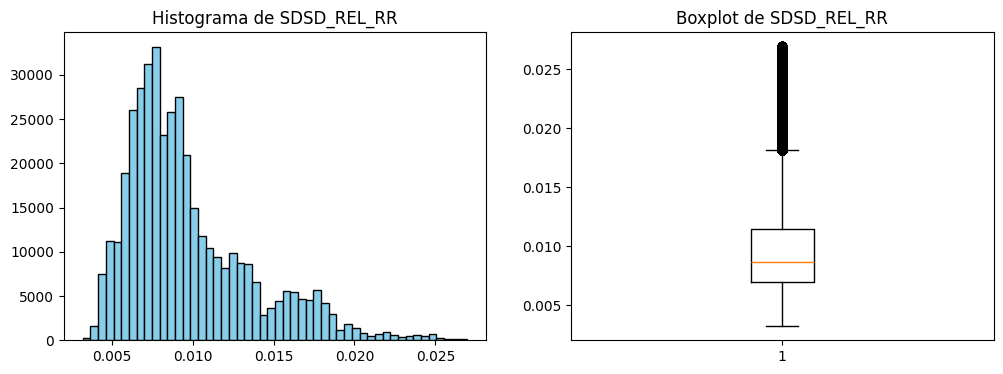

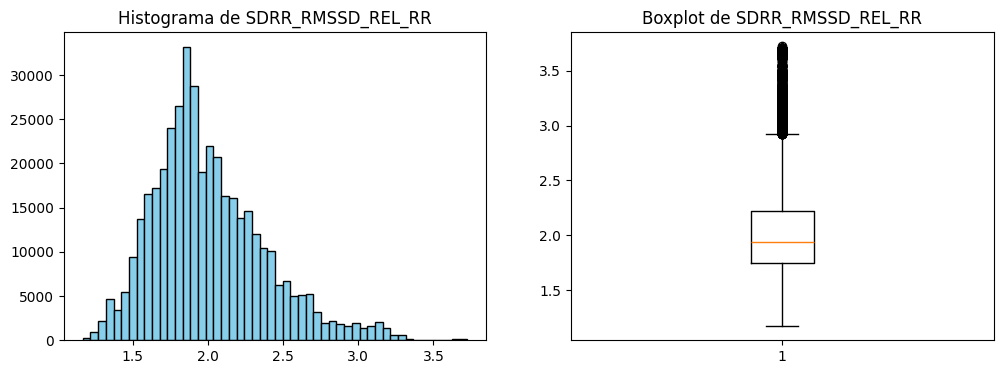

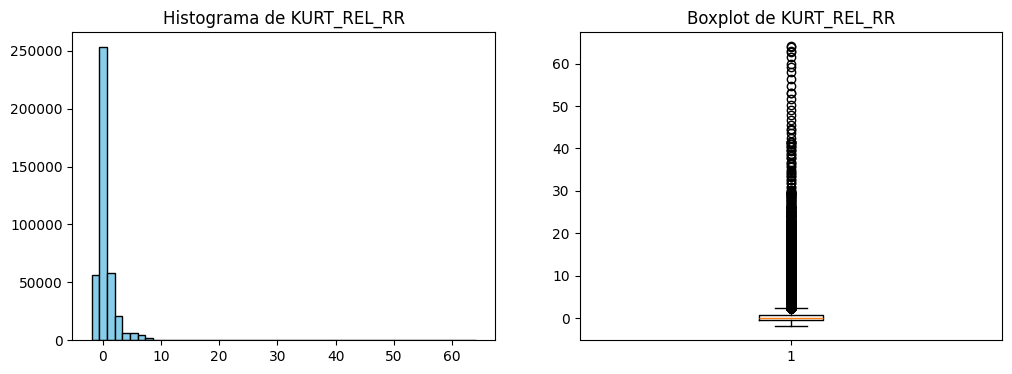

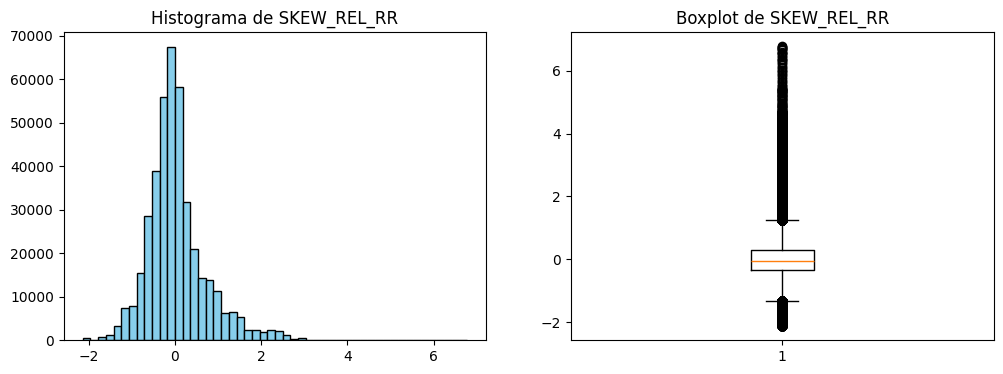

In [20]:
for col in colunas_numericas:
    plt.figure(figsize=(12,4))
    
    # Histograma
    plt.subplot(1,2,1)
    plt.hist(df[col], bins=50, color='skyblue', edgecolor='black')
    plt.title(f'Histograma de {col}')
    
    # Boxplot
    plt.subplot(1,2,2)
    plt.boxplot(df[col])
    plt.title(f'Boxplot de {col}')
    
    plt.show()

Comentários:

